# Implementation of MCP Neuron for AND and OR Function.

In [5]:
def MCP_Neurons_AND(X1, X2, T):
  """
  This functions implements basic AND operations with MCP Neuron for two inputs.
  Arguments:
  Inputs:
  X1 (1 nd array): An array of binary values.
  X2 (1 nd array): An array of binary values.
  Output:
  state_neuron(1D-list): An state of neuron 1 0r 0 for the particular inputs.
  """
  assert len(X1) == len(X2)
  ### YOUR CODE HERE ###
  # Perform an element wise addition of two input arrays stored in a new array(list):
  # Create a new array to put all the prediction let's name that a state_neuron.
  # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.
  # Perform element-wise addition and store in a new list
  element_wise_sum = [x1 + x2 for x1, x2 in zip(X1, X2)]

  # Create a new list to store neuron states
  state_neuron = []

  # Append 1 if sum is above threshold, otherwise append 0
  for element_sum in element_wise_sum:
    if element_sum >= T:
      state_neuron.append(1)
    else:
      state_neuron.append(0)
  return state_neuron

In [6]:
# Example usage for MCP_Neurons_AND function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 2  # Threshold value

# Call the MCP_Neurons_AND function
result = MCP_Neurons_AND(X1, X2, T)

# Print the result
print(f"Output of AND gate for inputs {X1} and {X2} with threshold {T}: {result}")


Output of AND gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 2: [0, 0, 0, 1]


In [7]:
def MCP_Neurons_OR(X1, X2, T):
    """
    This function implements basic OR operations with MCP Neuron for two inputs.
    Arguments:
    Inputs:
    X1 (1D array): An array of binary values.
    X2 (1D array): An array of binary values.
    Output:
    state_neuron (1D list): The state of the neuron (1 or 0) for the particular inputs.
    """
    assert len(X1) == len(X2)
    ### YOUR CODE HERE ###
    # Perform an element wise addition of two input arrays stored in a new array(list):
    # Create a new array to put all the prediction let's name that a state_neuron.
    # Append 1 in sate_neuron if sum (element) of above list is above Threshold else append 0.

    element_wise_sum = [x1 + x2 for x1, x2 in zip(X1, X2)]

    state_neuron = []

    for element_sum in element_wise_sum:
        if element_sum >= T:
            state_neuron.append(1)
        else:
            state_neuron.append(0)




    return state_neuron


In [8]:
# Example usage for MCP_Neurons_OR function
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
T = 1  # Threshold value for OR gate

# Call the MCP_Neurons_OR function
result_or = MCP_Neurons_OR(X1, X2, T)

# Print the result
print(f"Output of OR gate for inputs {X1} and {X2} with threshold {T}: {result_or}")


Output of OR gate for inputs [0, 0, 1, 1] and [0, 1, 0, 1] with threshold 1: [0, 1, 1, 1]


• Question - 1: List out all the limitations of MCP - Neurons.



1. Lack of Learning Ability
MCP neurons have fixed weights and thresholds, meaning they cannot learn from data or adjust weights based on experience.
They require manual tuning of weights, making them impractical for real-world applications.
2. Linearly Separable Problems Only
MCP neurons can only solve linearly separable problems (like AND, OR gates).
They fail to solve non-linearly separable problems (e.g., XOR problem), which led to the need for more advanced models like Perceptrons and Multi-Layer Neural Networks.
3. Binary Output Limitation
The model uses a step activation function, meaning the output is either 0 or 1.
It cannot handle continuous values, which limits its applicability in real-world tasks requiring probability estimates.
4. No Support for Multi-Layer Networks
MCP neurons are single-layer models and cannot form deep networks.
They lack the ability to capture complex hierarchical features, unlike modern deep learning architectures.
5. No Concept of Weight Adjustment (Gradient Descent)
MCP does not use backpropagation or gradient descent to optimize weights.
This limits its ability to adapt and generalize from training data.
6. No Time Dependence (Lacks Memory)
The model does not consider temporal dependencies, making it unsuitable for sequential data (e.g., speech, time-series predictions).
Unlike Recurrent Neural Networks (RNNs), it has no memory mechanism.

• Question - 2: Think if you can develop a logic to solve for XOR function using MCP Neuron.
{Can you devise a if else rules.}

We can't because method is not linearly separable. But we can build logic with if else. Here logic consiste of

In [21]:
def mcp_xor(x1, x2):
    if (x1 == 1 and x2 == 0) or (x1 == 0 and x2 == 1):
        return 1  # XOR condition satisfied
    else:
        return 0  # Otherwise, return 0

# Test cases
print(mcp_xor(0, 0))  # Output: 0
print(mcp_xor(0, 1))  # Output: 1
print(mcp_xor(1, 0))  # Output: 1
print(mcp_xor(1, 1))  # Output: 0

0
1
1
0


Here the output is correctly calculating the output for logical XOR gate.

# Implementation for 0 Vs. 1 Classification.

## Step 1: Load the Dataset

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Load the dataset
df_0_1 = pd.read_csv("/content/drive/MyDrive/AI ML/Week 3/mnist_0_and_1.csv")  # Add the correct file path if necessary

# Extract features and labels
X = df_0_1.drop(columns=["label"]).values  # 784 pixels
y = df_0_1["label"].values  # Labels (0 or 1)

# Check the shape of the features and labels
print("Feature matrix shape:", X.shape)
print("Label vector shape:", y.shape)


Feature matrix shape: (12665, 784)
Label vector shape: (12665,)


What does the shape of X represent?

Shape of X during row represent the single image of total 784 and for columns it represent single pixel location for all images

### Viewing the Dataset.

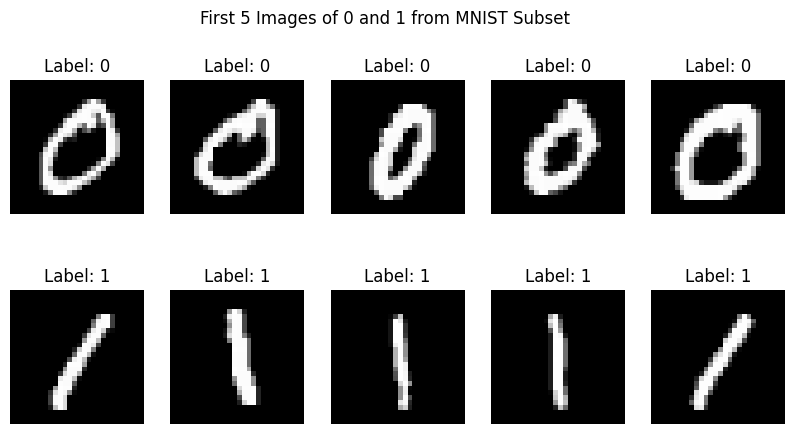

In [12]:
# Separate images for label 0 and label 1
images_0 = X[y == 0]  # Get all images with label 0
images_1 = X[y == 1]  # Get all images with label 1

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

# Check if the arrays have the required amount of data
if len(images_0) < 5 or len(images_1) < 5:
    print("Error: Not enough images in images_0 or images_1 to plot 5 images.")
else:
    for i in range(5):
        # Plot digit 0
        axes[0, i].imshow(images_0[i].reshape(28, 28), cmap="gray")
        axes[0, i].set_title("Label: 0")
        axes[0, i].axis("off")
        # Plot digit 1
        axes[1, i].imshow(images_1[i].reshape(28, 28), cmap="gray")
        axes[1, i].set_title("Label: 1")
        axes[1, i].axis("off")
    plt.suptitle("First 5 Images of 0 and 1 from MNIST Subset")
    plt.show()

## Step - 2 - Initializing the Weights:

In [22]:
# Initialize weights and bias
weights = np.zeros(X.shape[1])  # 784 weights (one for each pixel)
bias = 0
learning_rate = 0.1
epochs = 100

What does the weights array represent in this context?

The weights array represents the importance of each pixel in making a decision about whether the image is of a "0" or a "1."

Since each image has 784 pixels, we initialize 784 weights, one for each pixel.
These weights will be adjusted during training to minimize classification errors.
The final learned weights will determine how much influence each pixel has on the decision boundary for classifying the image.

Why are we initializing the weights to zero? What effect could this
have on the training process?

Initializing weights to zero is a simple approach, ensuring all weights start from the same baseline. The motivation is:

It ensures a consistent starting point for gradient descent.
It does not favor any pixel initially, making the model unbiased at the beginning.

While this works for simple models like logistic regression, it causes problems in neural networks:

Symmetry Problem

If all weights start as 0, every neuron in a layer updates in the same way during backpropagation.
This prevents the network from learning diverse and useful features, making all neurons redundant.

Slow Convergence

If all weights are 0, all gradients are the same, leading to slow updates.
The model may struggle to find the best weights efficiently.

## Step - 3 - Make a Decision function:

In [15]:
import numpy as np

def decision_function(X, weights, bias):
    """
    Compute the predicted labels for the input data.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - weights: Updated weights after training
    - bias: Updated bias after training

    Returns:
    - y_pred_all: The predicted labels for the input data
    """
    predictions = np.dot(X, weights) + bias
    #####Your Code Here############  # Activation function (step function)
    y_pred_all = np.where(predictions >= 0, 1, 0)
    return y_pred_all

## Step - 3 - Implement the Perceptron Learning Algorithm

In [17]:
def train_perceptron(X, y, weights, bias, learning_rate=0.1, epochs=100):
    """
    Train the perceptron using the Perceptron Learning Algorithm.

    Parameters:
    - X: Features (input data) as a numpy array of shape (n_samples, n_features)
    - y: Labels (true output) as a numpy array of shape (n_samples,)
    - weights: Initial weights as a numpy array of shape (n_features,)
    - bias: Initial bias value (scalar)
    - learning_rate: Learning rate for weight updates (default is 0.1)
    - epochs: Number of iterations to train the model (default is 100)

    Returns:
    - weights: Updated weights after training
    - bias: Updated bias after training
    - accuracy: Total correct prediction.
    """
    # Step 3: Perceptron Learning Algorithm
    # Your Code here#
    for epoch in range(epochs):
        for i in range(len(X)):
          prediction = decision_function(X[i], weights, bias)
          if y[i] - prediction != 0:
            weights += learning_rate * (y[i] - prediction) * X[i]
            bias += learning_rate * (y[i] - prediction)

    # Step 4: Calculate accuracy
    y_pred_all = decision_function(X, weights, bias)
    accuracy = np.mean(y_pred_all == y)

    return weights, bias, accuracy

What is the purpose of the output = np.dot(X[i], weights) + bias line?



This determines the raw activation value before applying the step function (decision function).
The result is passed through a threshold function (e.g., step function) to get a binary prediction (0 or 1).


  What happens when the prediction is wrong? How are the weights and
bias updated?


If the prediction is incorrect, the Perceptron Learning Rule updates the weights and bias to reduce future errors.

While error we apply the condition,
if y[i] - prediction != 0:
            weights += learning_rate * (y[i] - prediction) * X[i]
            bias += learning_rate * (y[i] - prediction)

If the prediction is too low (0 instead of 1), the update increases weights for relevant pixels.

If the prediction is too high (1 instead of 0), the update decreases weights for relevant pixels.

This process continues until the model correctly classifies most samples or reaches the max epochs.

Why is the final accuracy important, and what do you expect it to be?

It measures how well the model has learned to classify images correctly.
A high accuracy means the model can generalize well to new, unseen data.

If accuracy is low, it suggests:
The model is not learning (maybe due to bad data or wrong learning rate).
The data is not linearly separable (like XOR), and a Perceptron cannot solve it.
Expected Accuracy for MNIST (0 vs. 1 Classification)

Since digits 0 and 1 are linearly separable, the Perceptron should achieve near 100% accuracy if trained properly.


## Training the Perceptron

In [18]:
# After training the model with the perceptron_learning_algorithm
weights, bias, accuracy = train_perceptron(X, y, weights, bias)

# Evaluate the model using the new function
print("The Final Accuracy is: ", accuracy)

The Final Accuracy is:  1.0


## Step 5: Visualize Misclassified Images

In [20]:
# Get predictions for all data points
predictions = np.dot(X, weights) + bias
y_pred = np.where(predictions >= 0, 1, 0)

# Calculate final accuracy
final_accuracy = np.mean(y_pred == y)
print(f"Final Accuracy: {final_accuracy:.4f}")

# Step 5: Visualize Misclassified Images
misclassified_idx = np.where(y_pred != y)[0]
if len(misclassified_idx) > 0:
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for ax, idx in zip(axes.flat, misclassified_idx[:10]):  # Show 10 misclassified images
        ax.imshow(X[idx].reshape(28, 28), cmap="gray")
        ax.set_title(f"Pred: {y_pred[idx]}, True: {y[idx]}")
        ax.axis("off")
    plt.suptitle("Misclassified Images")
    plt.show()
else:
    print("All images were correctly classified!")

Final Accuracy: 1.0000
All images were correctly classified!


What does misclassified idx store, and how is it used in this code?


The line:

misclassified_idx = np.where(y_pred != y)[0]

np.where(y_pred != y)

finds indices where the predicted labels (y_pred) do not match the true labels (y).
misclassified_idx stores an array of indices corresponding to the misclassified images


If there are misclassified images, the code selects up to 10 misclassified images using:

for ax, idx in zip(axes.flat, misclassified_idx[:10]):

X[idx] retrieves the misclassified image from the dataset.

.reshape(28, 28)

converts the flattened 784-pixel vector back into a 28x28 grayscale image.

The image is displayed with its predicted vs. actual label using Matplotlib.
If no misclassified images exist, the code prints:
All images were correctly classified!"

How do you interpret the result if the output is ”All images were
correctly classified!”?



The perceptron correctly classified all 0s and 1s in the dataset.
This is expected because digits 0 and 1 are linearly separable, making them easy for a single-layer perceptron to distinguish.

Potential Overfitting

If this happens on training data, it's good (the model learned perfectly).
But if this happens on test data, it may indicate overfitting, meaning the model memorized the training set rather than generalizing well.